In [1]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
load_dotenv()

True

In [3]:
resp = requests.get(os.environ["DATA_BASE_URL"] + "extracted_data-no_text.jsonl")
df = pd.read_json(resp.text, lines=True)
df.head()

/tmp/ipykernel_164303/1569557511.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(resp.text, lines=True)


,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,property_lotSize,property_subtype,property_type,room_count,seller_id,service_charge,type,view,water,year_built
0,None,None,None,None,None,None,None,None,2024-09-11 10:29:17,None,...,2640.0,industrialSite,industrial,NaN,9123.0,None,rent,None,None,None
1,None,None,None,None,None,None,None,None,2024-09-13 22:42:47,None,...,4940.0,arableLand,agricultural,NaN,70766.0,None,sale,None,None,None
2,None,None,None,None,30%,None,None,None,2024-09-12 09:14:46,None,...,1985.0,plotInResidentialArea,plot,NaN,77095.0,None,sale,panorámás,None,None
3,None,van,None,None,None,5,None,None,2024-09-13 22:10:07,None,...,NaN,None,None,NaN,117386.0,None,sale,None,None,2001 és 2010 között
4,None,None,None,None,1%,None,None,None,2024-09-20 17:47:03,None,...,6000.0,otherPlot,plot,NaN,23222.0,None,sale,nincs megadva,None,None


In [4]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [5]:
df[df["year"] == 2024]

,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,property_subtype,property_type,room_count,seller_id,service_charge,type,view,water,year_built,year
0,None,None,None,None,None,None,None,None,2024-09-11 10:29:17,None,...,industrialSite,industrial,NaN,9123.0,None,rent,None,None,None,2024
1,None,None,None,None,None,None,None,None,2024-09-13 22:42:47,None,...,arableLand,agricultural,NaN,70766.0,None,sale,None,None,None,2024
2,None,None,None,None,30%,None,None,None,2024-09-12 09:14:46,None,...,plotInResidentialArea,plot,NaN,77095.0,None,sale,panorámás,None,None,2024
3,None,van,None,None,None,5,None,None,2024-09-13 22:10:07,None,...,None,None,NaN,117386.0,None,sale,None,None,2001 és 2010 között,2024
4,None,None,None,None,1%,None,None,None,2024-09-20 17:47:03,None,...,otherPlot,plot,NaN,23222.0,None,sale,nincs megadva,None,None,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18307,None,None,None,None,None,None,None,None,2024-02-23 21:23:15,van,...,None,None,NaN,1770.0,None,sale,nincs megadva,van,None,2024
18308,None,None,None,None,None,None,None,None,2024-02-29 17:37:40,van,...,None,None,NaN,24387.0,None,sale,nincs megadva,van,None,2024
18309,None,None,None,None,None,None,None,None,2024-02-22 09:53:18,utcában,...,None,None,NaN,9948.0,None,sale,nincs megadva,utcában,None,2024
18310,None,None,None,None,None,None,None,None,2024-02-29 15:10:44,None,...,None,None,NaN,1770.0,None,sale,None,None,None,2024


In [6]:
df = df[df['property_type'].isin(['lakás', 'flat'])]
df = df[df['type'].isin(['sale', 'Eladó'])]
df = df[df['nonEuroPrice_currency'].isin(['HUF'])]
# df = df[df["year"] == 2023]

In [7]:
df

,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,property_subtype,property_type,room_count,seller_id,service_charge,type,view,water,year_built,year
20964,None,van,None,None,None,4,3 m-nél magasabb,duplakomfortos,2023-03-22 16:21:18,None,...,brickFlat,flat,3.0,NaN,None,sale,street,None,2014,2023
20977,None,van,None,None,None,nincs megadva,nincs megadva,luxus,2023-03-22 19:40:30,None,...,brickFlat,flat,3.0,NaN,None,sale,street,None,nincs megadva,2023
20981,None,nincs megadva,None,None,None,nincs megadva,nincs megadva,nincs megadva,2023-04-01 09:55:20,None,...,brickFlat,flat,2.0,NaN,None,sale,garden,None,2011,2023
20988,None,nincs,None,None,None,4,3 m-nél alacsonyabb,duplakomfortos,2023-03-22 15:20:34,None,...,brickFlat,flat,30.0,NaN,None,sale,street,None,2001 és 2010 között,2023
20990,None,nincs megadva,None,None,None,7,nincs megadva,összkomfortos,2023-03-22 19:54:10,None,...,brickFlat,flat,2.0,NaN,None,sale,street,None,nincs megadva,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61459,None,nincs,None,None,None,nincs megadva,3 m-nél alacsonyabb,összkomfortos,2017-11-22 21:49:48,None,...,tégla,lakás,NaN,NaN,None,Eladó,None,None,None,2017
61460,None,van,None,None,None,10,3 m-nél alacsonyabb,komfortos,2017-10-22 15:16:14,None,...,panel,lakás,NaN,NaN,None,Eladó,None,None,None,2017
61461,None,van,None,None,None,2,nincs megadva,luxus,2017-10-22 15:16:29,None,...,tégla,lakás,NaN,NaN,None,Eladó,None,None,None,2017
61463,None,None,None,None,None,nincs megadva,3 m vagy magasabb,összkomfortos,2017-08-19 22:29:32,None,...,tégla,lakás,NaN,NaN,None,Eladó,None,None,None,2017


In [8]:
df["property_subtype"]

20964    brickFlat
20977    brickFlat
20981    brickFlat
20988    brickFlat
20990    brickFlat
           ...    
61459        tégla
61460        panel
61461        tégla
61463        tégla
61464        panel
Name: property_subtype, Length: 11213, dtype: object

# Exploratory Data Analysis

Let's examine the relationship between price and area size to better understand our data.

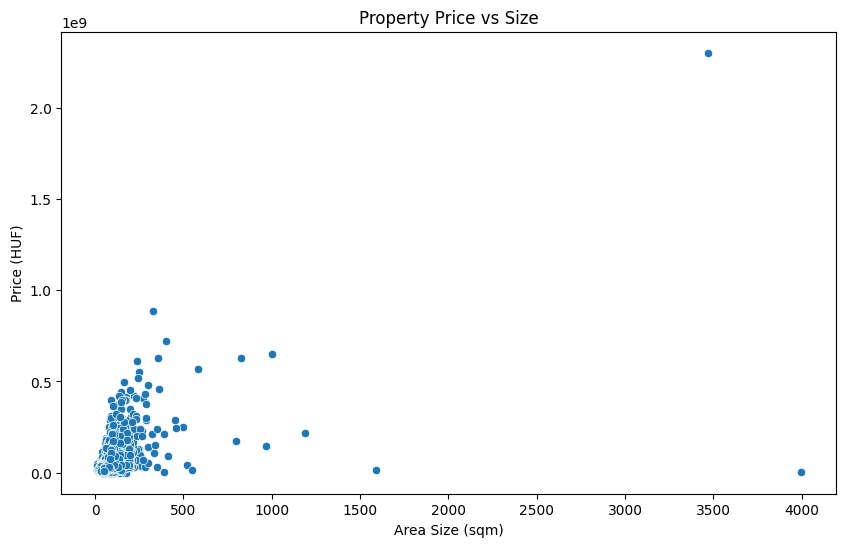

Correlation between area size and price: 0.5220


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_areaSize', y='nonEuroPrice_amount', data=df)
plt.title('Property Price vs Size')
plt.xlabel('Area Size (sqm)')
plt.ylabel('Price (HUF)')
plt.show()

# Calculate correlation
correlation = df['property_areaSize'].corr(df['nonEuroPrice_amount'])
print(f"Correlation between area size and price: {correlation:.4f}")

# Data Preprocessing

Let's enhance our model by:
1. Adding more relevant features
2. Removing outliers
3. Encoding categorical features

In [10]:
# Check what categorical features we have available
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
for col in categorical_cols:
    non_null_count = df[col].count()
    if non_null_count > 300:  # Only consider columns with enough data
        n_unique = df[col].nunique()
        print(f"{col}: {non_null_count} non-null values, {n_unique} unique values")

Categorical columns:
accessible: 449 non-null values, 3 unique values
air_conditioning: 4650 non-null values, 3 unique values
building_levels: 8040 non-null values, 12 unique values
ceiling_height: 8040 non-null values, 4 unique values
comfort: 8040 non-null values, 7 unique values
elevator: 8040 non-null values, 3 unique values
energy_certificate: 6524 non-null values, 21 unique values
floor: 8040 non-null values, 15 unique values
location: 11213 non-null values, 1530 unique values
nonEuroPrice_currency: 11213 non-null values, 1 unique values
property_condition: 11213 non-null values, 9 unique values
property_subtype: 11213 non-null values, 6 unique values
property_type: 11213 non-null values, 2 unique values
type: 11213 non-null values, 2 unique values
view: 1671 non-null values, 4 unique values
year_built: 6764 non-null values, 23 unique values


In [11]:
df.columns

Index(['accessible', 'air_conditioning', 'attic', 'bath_and_wc',
       'buildability', 'building_levels', 'ceiling_height', 'comfort', 'date',
       'electricity', 'elevator', 'energy_certificate', 'floor',
       'floor_area_ratio', 'furnished', 'gross_floor_area', 'id', 'location',
       'min_lease_time', 'move_in', 'nonEuroPrice_amount',
       'nonEuroPrice_currency', 'office_building_category', 'parking_lots',
       'property_areaSize', 'property_condition', 'property_energySaving',
       'property_lotSize', 'property_subtype', 'property_type', 'room_count',
       'seller_id', 'service_charge', 'type', 'view', 'water', 'year_built',
       'year'],
      dtype='object')

In [12]:
df["floor"] = df["floor"].replace({
    "földszint": 0,
    "félemelet": 0.5,
    "szuterén": -1,
    "nincs megadva": np.nan,
    "10 felett": 11
})
df["floor"] = pd.to_numeric(df["floor"], errors='coerce')

df["year"] = pd.to_numeric(df["year"], errors='coerce')

df['property_subtype'] = df['property_subtype'].replace({
    'tégla': 'brick', 
    'blockOfFlats': 'panel',
    'brickFlat': 'brick',
    'csúszózsalus': 'slipFormed',
})

df['has_elevator'] = df['elevator'].replace({
    'van': 1,
    'nincs': 0,
    'nincs megadva': 0
})

df['has_ac'] = df['air_conditioning'].replace({
    'van': 1,
    'nincs': 0,
    'nincs megadva': 0
})

comfort_order = {'nincs megadva': 0, 'komfort nélküli': 1, 'félkomfortos': 2, 
                'komfortos': 3, 'összkomfortos': 4, 'duplakomfortos': 5, 'luxus': 6}
df['comfort_level'] = df['comfort'].map(comfort_order)

condition_order = {'befejezetlen': -1, 'nincs megadva': 0, 'felújítandó': 1, 'közepes állapotú': 2, 
                  'jó állapotú': 3, 'felújított': 4, 'újszerű': 5, 'új építésű': 6, np.nan: 0}
df['condition_score'] = df['property_condition'].map(condition_order)

df[['property_areaSize', 'room_count', 'floor', 'has_elevator', 'has_ac', 
    'comfort_level', 'condition_score', 'property_subtype']].head()

/tmp/ipykernel_164303/2366370259.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_elevator'] = df['elevator'].replace({
/tmp/ipykernel_164303/2366370259.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_ac'] = df['air_conditioning'].replace({


,property_areaSize,room_count,floor,has_elevator,has_ac,comfort_level,condition_score,property_subtype
20964,203.0,3.0,4.0,1.0,1.0,5.0,5.0,brick
20977,176.0,3.0,2.0,1.0,1.0,6.0,4.0,brick
20981,50.0,2.0,NaN,0.0,0.0,0.0,5.0,brick
20988,825.0,30.0,4.0,1.0,0.0,5.0,5.0,brick
20990,56.0,2.0,1.0,1.0,0.0,4.0,3.0,brick


In [13]:
# Check for missing values in key columns
print("Missing values in key columns:")
print(df[['property_areaSize', 'nonEuroPrice_amount', 'room_count', 'floor', 
         'property_subtype', 'condition_score', 'comfort_level', 'has_elevator', 'has_ac']].isnull().sum())

# Handle potential outliers
Q1 = df['nonEuroPrice_amount'].quantile(0.25)
Q3 = df['nonEuroPrice_amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers (adjust the multiplier as needed)
filter = (df['nonEuroPrice_amount'] >= Q1 - 1.5 * IQR) & (df['nonEuroPrice_amount'] <= Q3 + 1.5 * IQR)
df_filtered = df[filter]

print(f"Original data shape: {df.shape}, After outlier removal: {df_filtered.shape}")

# Create price per square meter column (useful for analysis)
df_filtered['price_per_sqm'] = df_filtered['nonEuroPrice_amount'] / df_filtered['property_areaSize']

# One-hot encode property_subtype
subtype_dummies = pd.get_dummies(df_filtered['property_subtype'], prefix='subtype', drop_first=True)
df_filtered = pd.concat([df_filtered, subtype_dummies], axis=1)

df_filtered.head()

Missing values in key columns:
property_areaSize         0
nonEuroPrice_amount       0
room_count             9040
floor                  3777
property_subtype          0
condition_score         516
comfort_level          3173
has_elevator           3173
has_ac                 6563
dtype: int64
Original data shape: (11213, 42), After outlier removal: (10508, 42)


/tmp/ipykernel_164303/638503096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price_per_sqm'] = df_filtered['nonEuroPrice_amount'] / df_filtered['property_areaSize']


,accessible,air_conditioning,attic,bath_and_wc,buildability,building_levels,ceiling_height,comfort,date,electricity,...,water,year_built,year,has_elevator,has_ac,comfort_level,condition_score,price_per_sqm,subtype_panel,subtype_slipFormed
20981,None,nincs megadva,None,None,None,nincs megadva,nincs megadva,nincs megadva,2023-04-01 09:55:20,None,...,None,2011,2023,0.0,0.0,0.0,5.0,1.360000e+06,False,False
20990,None,nincs megadva,None,None,None,7,nincs megadva,összkomfortos,2023-03-22 19:54:10,None,...,None,nincs megadva,2023,1.0,0.0,4.0,3.0,1.339286e+06,False,False
20991,None,nincs megadva,None,None,None,6,nincs megadva,luxus,2023-03-26 12:13:52,None,...,None,1950 előtt,2023,1.0,0.0,6.0,4.0,1.065333e+06,False,False
21029,igen,nincs megadva,None,None,None,9,3 m-nél alacsonyabb,duplakomfortos,2023-03-22 13:47:34,None,...,None,2023,2023,1.0,0.0,5.0,6.0,1.269643e+06,False,False
21036,igen,nincs megadva,None,None,None,4,3 m-nél alacsonyabb,duplakomfortos,2023-03-23 21:44:16,None,...,None,2022,2023,1.0,0.0,5.0,6.0,5.828125e+05,False,False


In [14]:
# Select multiple relevant features
numerical_features = ['property_areaSize', 'room_count', 'year', 'floor']
binary_features = ['has_elevator', 'has_ac']
ordinal_features = ['comfort_level', 'condition_score']
categorical_features = [col for col in df_filtered.columns if col.startswith('subtype_')]

# All features combined
feature_cols = numerical_features + binary_features + ordinal_features + categorical_features

# Create feature matrix and target vector
X = df_filtered[feature_cols].copy()
y = df_filtered["nonEuroPrice_amount"]

# Handle missing values
# For numerical features, use mean
for col in numerical_features:
    X[col] = X[col].fillna(X[col].mean())

# For binary features, use most frequent value (mode)
for col in binary_features:
    if col in X.columns and X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mode()[0])

# For ordinal features, use median
for col in ordinal_features:
    if col in X.columns and X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].median())

# Check feature correlations with price
correlations = X.corrwith(y).sort_values(ascending=False)
print("Feature correlations with price:")
print(correlations)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(X.isnull().sum().sum())

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature correlations with price:
property_areaSize     0.252119
room_count            0.210282
year                  0.198240
condition_score       0.166895
has_elevator          0.157497
has_ac                0.141691
comfort_level         0.133483
floor                -0.040491
subtype_slipFormed   -0.077441
subtype_panel        -0.295007
dtype: float64

Missing values after imputation:
0

Feature matrix shape: (10508, 10)
Target vector shape: (10508,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance (only numerical features need scaling)
scaler = StandardScaler()
# Identify which columns to scale (numerical features and ordinal features)
cols_to_scale = numerical_features + ordinal_features

# Scale only numerical and ordinal columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root mean squared error
mae = mean_absolute_error(y_test, y_pred)  # Mean absolute error
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 883006764475900.38
Root Mean Squared Error: 29715429.74
Mean Absolute Error: 14326742.79
R^2 Score: -0.5927


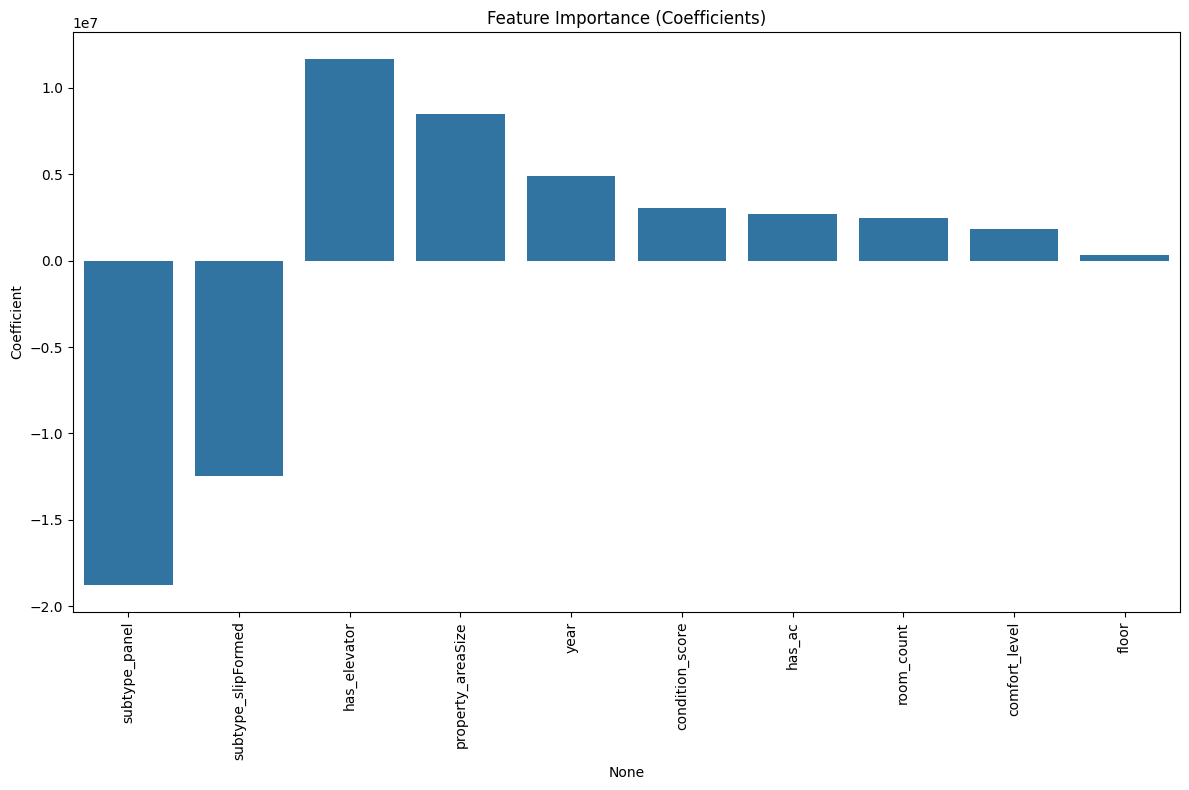

Top 10 most important features:
                     Coefficient  Abs_Coefficient
subtype_panel      -1.880343e+07     1.880343e+07
subtype_slipFormed -1.247324e+07     1.247324e+07
has_elevator        1.169552e+07     1.169552e+07
property_areaSize   8.503976e+06     8.503976e+06
year                4.916554e+06     4.916554e+06
condition_score     3.053218e+06     3.053218e+06
has_ac              2.716071e+06     2.716071e+06
room_count          2.486430e+06     2.486430e+06
comfort_level       1.809861e+06     1.809861e+06
floor               3.509209e+05     3.509209e+05


In [16]:
# Create a dataframe of feature coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.xticks(rotation=90)
plt.title('Feature Importance (Coefficients)')
plt.tight_layout()
plt.show()

# Display top 10 most important features
print("Top 10 most important features:")
print(coefficients.head(10))

# Model Comparison

Let's compare multiple regression models to find the best one for our data.

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from time import sleep

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=200),
    'XGBoost': xgb.XGBRegressor(n_estimators=50, random_state=42, max_depth=4),
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    results[name] = {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std()
    }
    print(f"{name} - Mean RMSE: {rmse_scores.mean():.2f}, Std Dev: {rmse_scores.std():.2f}")
    sleep(0.5)

# Train the best model on the full training set
best_model_name = min(results, key=lambda k: results[k]['mean_rmse'])
print(f"\nBest model: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate best model
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Best model performance - R²: {r2_best:.4f}, RMSE: {rmse_best:.2f}")

Linear Regression - Mean RMSE: 19131654.09, Std Dev: 2014583.39
Random Forest - Mean RMSE: 16900767.90, Std Dev: 198753.56
Gradient Boosting - Mean RMSE: 15727101.00, Std Dev: 308857.23
XGBoost - Mean RMSE: 15705267.35, Std Dev: 260324.99

Best model: XGBoost
Best model performance - R²: 0.5643, RMSE: 15542821.25


# Feature Importance from Best Model

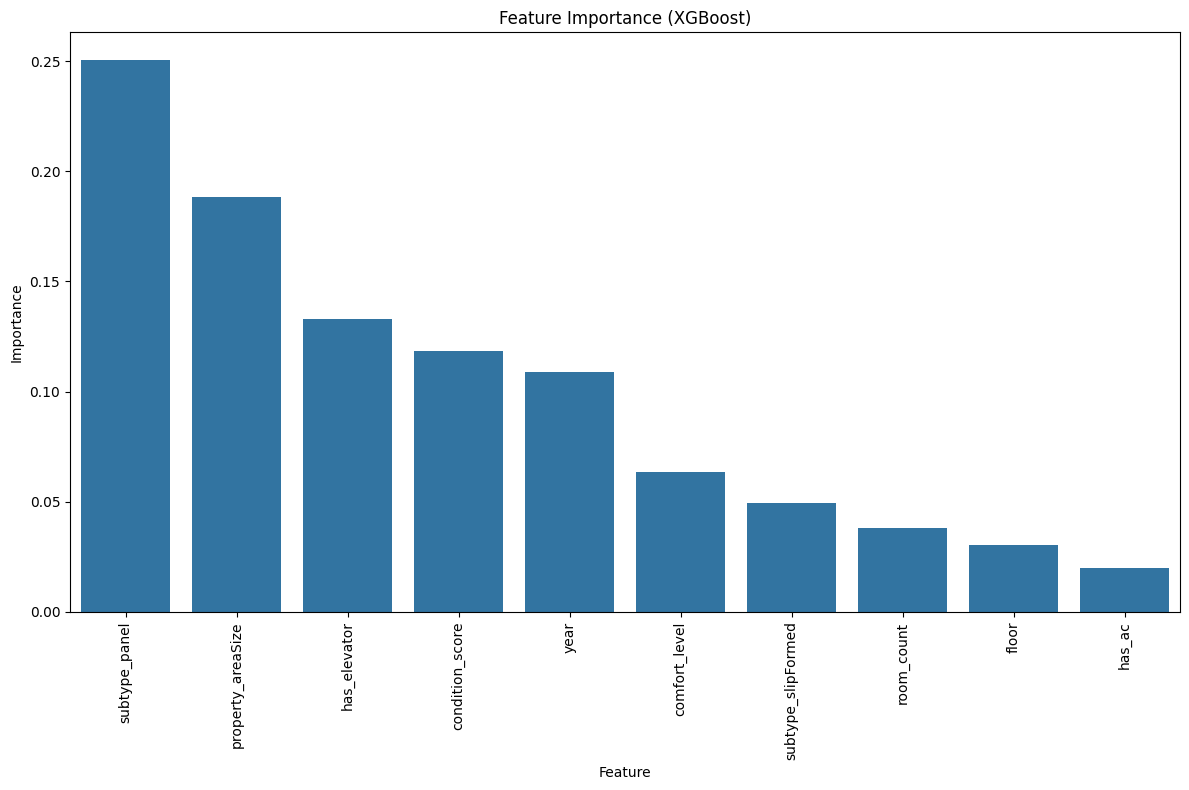

Top 10 most important features:
              Feature  Importance
8       subtype_panel    0.250639
0   property_areaSize    0.188408
4        has_elevator    0.133017
7     condition_score    0.118224
2                year    0.108928
6       comfort_level    0.063436
9  subtype_slipFormed    0.049252
1          room_count    0.037905
3               floor    0.030262
5              has_ac    0.019930


In [18]:
# If the best model is tree-based (Random Forest or Gradient Boosting), visualize feature importance
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
    importances = importances.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Feature', y='Importance', data=importances.head(15))
    plt.xticks(rotation=90)
    plt.title(f'Feature Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 most important features:")
    print(importances.head(10))

# Price Prediction Function

Create a simple function to predict property prices based on key attributes.

In [20]:
def predict_property_price(area_size, room_count, property_subtype='brick', condition='jó állapotú', 
                          has_elevator=1, has_ac=1, floor=3, year=2020, comfort='összkomfortos'):
    
    condition_score = condition_order.get(condition, 3)
    comfort_score = comfort_order.get(comfort, 4)
    
    input_data = pd.DataFrame({
        'property_areaSize': [area_size],
        'room_count': [room_count],
        'year': [year],
        'floor': [floor],
        'has_elevator': [has_elevator],
        'has_ac': [has_ac],
        'condition_score': [condition_score],
        'comfort_level': [comfort_score]
    })
    
    for col in categorical_features:
        subtype_name = col.replace('subtype_', '')
        input_data[col] = 1 if property_subtype == subtype_name else 0
    
    missing_cols = set(feature_cols) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    
    input_data = input_data[feature_cols]
    input_data[cols_to_scale] = scaler.transform(input_data[cols_to_scale])
    predicted_price = best_model.predict(input_data)[0]
    
    return {
        'predicted_price_formatted': f"{predicted_price:,.0f} HUF",
        'price_per_sqm_formatted': f"{(predicted_price / area_size):,.0f} HUF/m²"
    }

# Example usage
example_prediction = predict_property_price(
    area_size=20,
    room_count=1,
    property_subtype='brick',
    condition='felújított',
    has_elevator=1,
    has_ac=1,
    floor=3,
    year=2023,
)

print("Example prediction:")
for key, value in example_prediction.items():
    print(f"{key}: {value}")

Example prediction:
predicted_price_formatted: 28,757,712 HUF
price_per_sqm_formatted: 1,437,886 HUF/m²
